In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("winequality-red _1_.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
X = df.copy()
y = X.pop("quality")

In [7]:
import matplotlib.pylab as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.quality = le.fit_transform(df.quality)

<AxesSubplot:xlabel='quality', ylabel='count'>

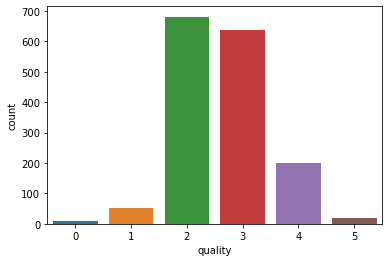

In [9]:
sns.countplot(x="quality", data=df)

In [11]:
from imblearn.over_sampling import SMOTE

# strategys = {0: 200, 1: 300, 4: 400, 5: 250}
oversample = SMOTE(sampling_strategy= {0: 200, 1: 300, 4: 400, 5: 250})
X, y= oversample.fit_resample(X, y)

df = pd.concat([X, y], axis=1)

ValueError: The {0, 1} target class is/are not present in the data.

In [12]:
from sklearn.feature_selection import mutual_info_classif as MIC

def make_mi_scores(X, y):
    mi_scores = MIC(X, y)
    mi_scores = pd.Series(mi_scores, index=X.columns, name="MI Scores")
    mi_scores = mi_scores.sort_values(ascending=False).to_frame()
    
    sns.barplot(x="MI Scores", y=mi_scores.index, data=mi_scores)
    plt.show()
    
    return mi_scores

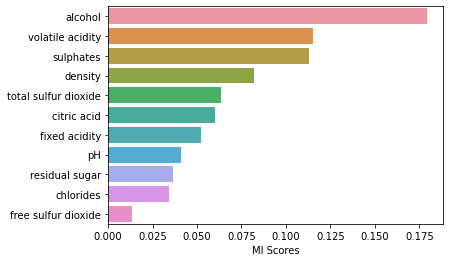

,MI Scores
alcohol,0.179284
volatile acidity,0.115176
sulphates,0.113094
density,0.082198
total sulfur dioxide,0.063507
citric acid,0.060183
fixed acidity,0.052411
pH,0.040990
residual sugar,0.036453
chlorides,0.034025


In [13]:
make_mi_scores(X,y)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

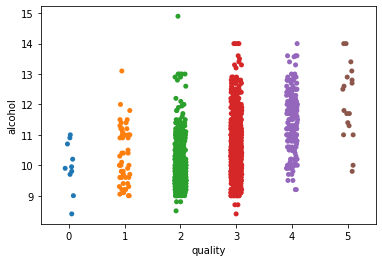

In [14]:
sns.stripplot(x="quality", y="alcohol", data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

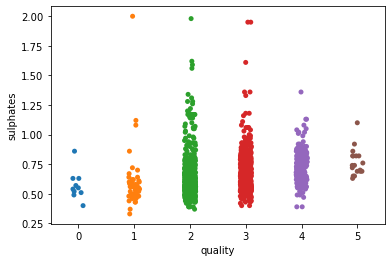

In [15]:
sns.stripplot(x="quality", y="sulphates", data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

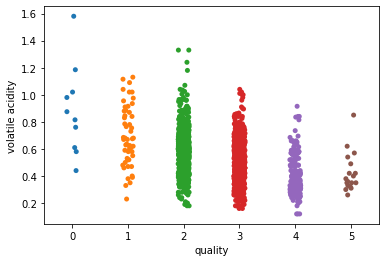

In [16]:
sns.stripplot(x="quality", y="volatile acidity", data=df)

In [17]:
from sklearn.decomposition import PCA

def apply_pca(X, suffix="", standardize=True):
    #standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    #apply pca
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    #convert to dataframe
    component_names = [f"PC{i+1}_{suffix}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    
    #create loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=component_names,
        index = X.columns
    )
    
    return pca, X_pca, loadings

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    
    return axs


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

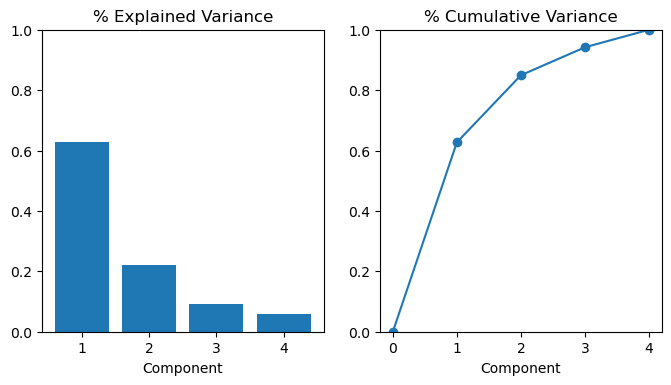

In [18]:
features = ["fixed acidity", "volatile acidity", "pH", "citric acid"]

pca, X_pca_acidity, loadings = apply_pca(X[features], suffix="acidity")

plot_variance(pca)

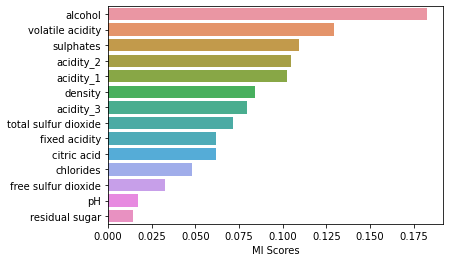

,MI Scores
alcohol,0.182678
volatile acidity,0.129302
sulphates,0.109356
acidity_2,0.105050
acidity_1,0.102769
density,0.084380
acidity_3,0.079348
total sulfur dioxide,0.071856
fixed acidity,0.061932
citric acid,0.061701


In [19]:
# PC1, fixed acidity and citric acid - same sign
X["acidity_1"] = X["fixed acidity"] + X["citric acid"]

# PC1, volatile acidity and pH - same sign
X["acidity_2"] = X["volatile acidity"] + X["pH"]

# PC2, fixed acidity and volatile acidity - same sign
X["acidity_3"] = X["fixed acidity"] + X["volatile acidity"]

make_mi_scores(X, y)

<AxesSubplot:xlabel='quality', ylabel='acidity_2'>

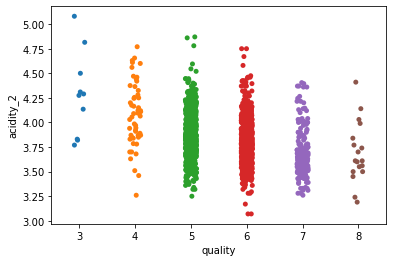

In [20]:
sns.stripplot(x="quality", y="acidity_2", data=pd.concat([X, y], axis=1))

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

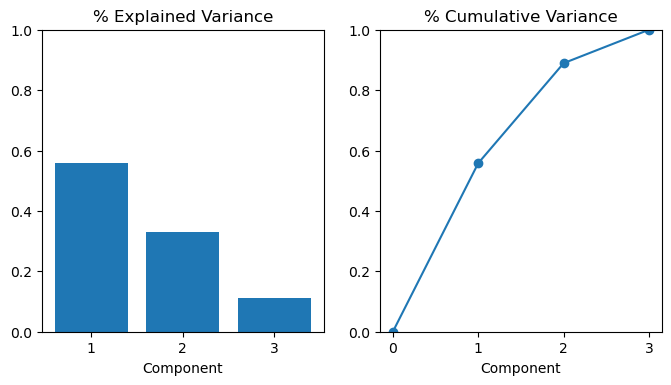

In [21]:
features = ["total sulfur dioxide", "free sulfur dioxide", "sulphates"]

pca, X_pca_sulfur, loadings = apply_pca(X[features], suffix="sulfur")

plot_variance(pca)

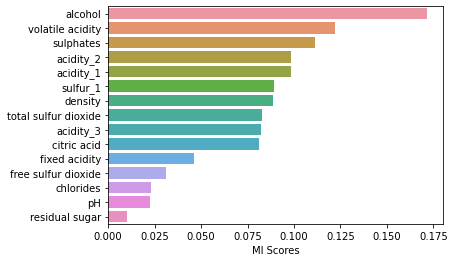

,MI Scores
alcohol,0.171493
volatile acidity,0.122163
sulphates,0.111512
acidity_2,0.098434
acidity_1,0.098214
sulfur_1,0.088975
density,0.088740
total sulfur dioxide,0.082559
acidity_3,0.082125
citric acid,0.081185


In [22]:
# in PC1, total and free sulfur dioxide, same sign
X["sulfur_1"] = X["total sulfur dioxide"] + X["free sulfur dioxide"]

make_mi_scores(X, y)

<AxesSubplot:xlabel='quality', ylabel='sulfur_1'>

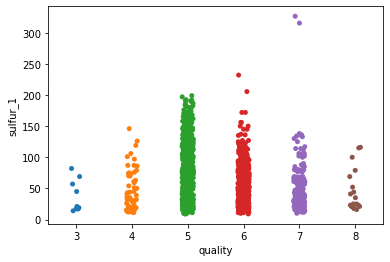

In [23]:
sns.stripplot(x="quality", y="sulfur_1", data=pd.concat([X, y], axis=1))

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

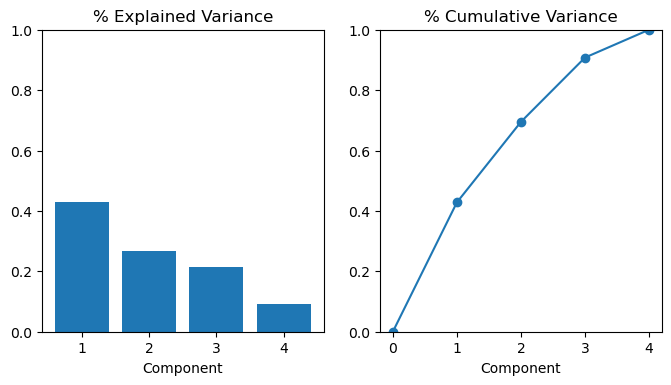

In [24]:
features = ["density", "alcohol", "residual sugar", "chlorides"]

pca, X_pca_alcohol_and_sugar, loadings = apply_pca(X[features], suffix="alcohol_sugar")

plot_variance(pca)

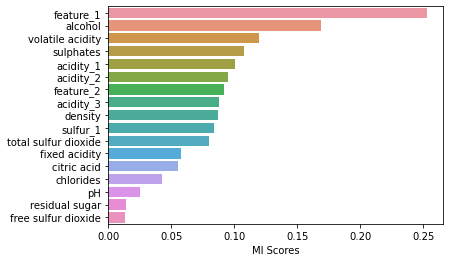

,MI Scores
feature_1,0.253024
alcohol,0.168803
volatile acidity,0.119574
sulphates,0.108218
acidity_1,0.100902
acidity_2,0.095234
feature_2,0.091769
acidity_3,0.088370
density,0.087036
sulfur_1,0.084134


In [25]:
X["feature_1"] = X["density"] / X["alcohol"]
X["feature_2"] = X["residual sugar"] + X["chlorides"]
make_mi_scores(X, y)

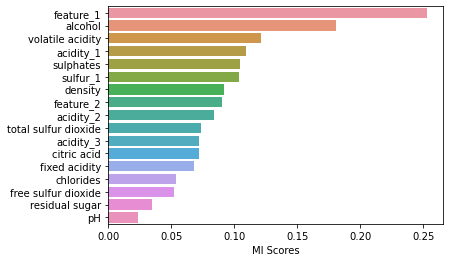

,MI Scores
feature_1,0.253065
alcohol,0.180704
volatile acidity,0.121586
acidity_1,0.109214
sulphates,0.105088
sulfur_1,0.103901
density,0.091769
feature_2,0.090444
acidity_2,0.084148
total sulfur dioxide,0.073636


In [26]:
make_mi_scores(X, y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [31]:
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import GridSearchCV

xgb_model = XGBC(use_label_encoder=False)

grid = GridSearchCV(xgb_model, param_grid={
    "learning_rate": [0.05],
    "n_estimators": [500]
}, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_

[15:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.6817677696078431

In [29]:
X = df.copy()
y = X.pop("quality")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [30]:
grid.fit(X_train, y_train)
grid.best_score_

[15:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.6817677696078431